In [1]:
'''
    Author: A.Shrikant
'''

'\n    Author: A.Shrikant\n'

In [2]:
# Attributes Information:

# label: Label for the SMS message could be either 'ham' or 'spam'.
# message: SMS message.
# length: Number of characters in the SMS message.
# punct: Number of punctuations in the SMS message.

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('dataset/spam.tsv', sep='\t')

In [5]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
df.iloc[0].message

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
len(df.iloc[0].message)

111

In [8]:
df.iloc[4].message

"Nah I don't think he goes to usf, he lives around here though"

In [9]:
len(df.iloc[4].message)

61

In [10]:
df.shape

(5572, 4)

In [11]:
# Not removing the duplicate rows becasue the duplicates are very less in comparision to the #rows in the dataset.
df.duplicated().sum()

403

In [12]:
# Unique rows:
5572-403

5169

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


## Dropping the 'length', 'punct' columns since they are not required for spam/ham classification:

In [14]:
df.drop(columns = ['length', 'punct'], inplace = True)

In [15]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Checking Data imbalance:

In [16]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

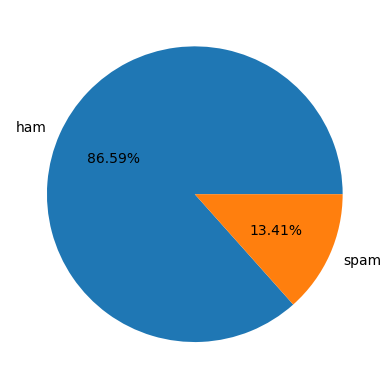

In [17]:
plt.pie(df.label.value_counts(), labels=df.label.value_counts().index.values, autopct="%.2f%%")
plt.show()

## Treating Data imbalance:

In [18]:
ham = df[df['label'] == 'ham']
ham

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
spam = df[df['label'] == 'spam']
spam

,label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [20]:
ham.duplicated().sum()

309

In [21]:
spam.duplicated().sum()

94

In [22]:
# Performing Oversampling for the minority class 'spam' SMS using resampling with replacement strategy.

spam_resampled = spam.sample(ham.shape[0], replace=True)
spam_resampled

,label,message
1613,spam,RT-KIng Pro Video Club>> Need help? info@ringt...
3174,spam,"Dear Voucher Holder, To claim this weeks offer..."
1207,spam,"As a SIM subscriber, you are selected to recei..."
5030,spam,I'd like to tell you my deepest darkest fantas...
650,spam,"You have won ?1,000 cash or a ?2,000 prize! To..."
...,...,...
3548,spam,Rock yr chik. Get 100's of filthy films &XXX p...
690,spam,<Forwarded from 448712404000>Please CALL 08712...
5482,spam,URGENT We are trying to contact you Last weeke...
4206,spam,IMPORTANT INFORMATION 4 ORANGE USER 0796XXXXXX...


In [23]:
spam_resampled.duplicated().sum()

4173

In [24]:
df1 = pd.concat([ham, spam_resampled], ignore_index=True)
df1

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,ham,Even my brother is not like to speak with me. ...
...,...,...
9645,spam,Rock yr chik. Get 100's of filthy films &XXX p...
9646,spam,<Forwarded from 448712404000>Please CALL 08712...
9647,spam,URGENT We are trying to contact you Last weeke...
9648,spam,IMPORTANT INFORMATION 4 ORANGE USER 0796XXXXXX...


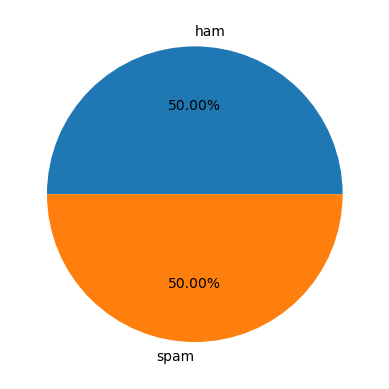

In [25]:
plt.pie(df1.label.value_counts(), labels=df1.label.value_counts().index.values, autopct="%.2f%%")
plt.show()

In [26]:
import re
import nltk

## Terminologies related to Natural Language Processing:

**Linguistics** - It is the scientific study of the language. It includes studying the vocabulary of the language, sentence 
formation, grammar, phonetics, etymology.

**Phonetics**: Study about human speech sounds like how human produce sounds and how they perceive it. 

**Etymology**: Study about the origin of words/phrases and tracing out their developments and relationships.

**Morphology**: The study of the different forms, words may have in particular their inflected forms.

**Inflect a Word**: Change the form of (a word) to express a particular grammatical function or attribute, typically tense, 
mood, person, number, and gender.
**Example**: 
- **alumnus**: a male graduate, **alumni**: a group of male graduates, **alumna**: a female graduate, **alumnae**: a group of female graduates
- run, running, ran

**Root form of a word**: The base word without any prefix or suffix.
**Example**: running, its root word is run.

**Word Stem**: A stem word, often simply referred to as a "stem," is the base or root form of a word to which prefixes and 
suffixes can be added to create new words or inflected forms. It's the part of a word that carries the core meaning and 
can stand alone as a word in its own right.

**Examples**: 
- In the word **"happiness"** the stem word is **"happi"**.
- For the word **"running"** the stem word is **"run"**.
- For the word **"programming"** the stem word is **"program"**
- For the word **"programmer"** the stem word is **"programm"**
- For the word **"alumnus"** the stem word is **"alumnu"**
- For the word **"alumni"** the stem word is **"alumni"**
- For the word **"alumnae"** the stem word is **"alumna"**

**Note**: Stem word need not be always meaningful.

**Lemma**: A lemma, in linguistics, is the base or dictionary form of a word. It is the form of a word that is typically listed 
in dictionaries and glossaries. Lemmas are used as a standard reference point for analyzing and categorizing words within a 
language.
**Examples**: 
- In the word **"mice"** the lemma is **"mouse"**.
- For the word **"alumni"** the lemma is **"alumnus"**
- For the word **"universally"** the lemma is **"universally"**

**Corpus**: It refers to a large and structured collection of texts or spoken language data that is systematically gathered and 
stored for linguistic analysis and research.

**Tokenization**: Breaking down a piece of text into individual words. This is the second step of text processing and is done
after removing the punctuations from the text.

## Text Normalization Technique:

### Stemming:

**Stemming** is a technique used to reduce an inflected word down to its word stem i.e. inflected forms of a word are reduced to their base form. This is like normalizing the word so that different inflected forms of the same base word could be clubbed together with the base form of the word from which the core meaning for those different inflected forms come from.

**Advantage of Stemming:**
- Stemming reduces dimensionality of the text data i.e it reduces the number of unique words in the dictionary we get after pre-processing the text documents, as a result the text processing algorithms speed increases.

### Lemmatization:

**Lemmatization** is another technique used to reduce inflected words down to their root word. Unlike Stemming Lemmatization always produces a **lemma** for the word being reduced, which is the dictionary form of that original word.

## Applying the text pre-processing steps:

### Step 1: Removing the punctuation marks from each SMS message.

### Step 2: Case Normalization(Converting the text into lower case).

### Step 3. Removing the 'stopwords' i.e. words that do not contain much information from each of the SMS message.

### Step 4: Performing message normalization by applying techniques like Stemming or Lemmatization.

### Step 5: Tokenizing(breaking down a piece of text into individual words) each of the SMS messages. 

### Step 6: Converting SMS messages into a matrix of token counts where each column represent a unique word obtained after Tokenization of each SMS message,  a row represent an SMS message also known as 'Bag of Words' and the cell represents the #count of that word/token in that corresponding SMS message.

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [30]:
ps = PorterStemmer()

In [31]:
import string

In [32]:
corpus = []

for i in range(0, len(df1)):
#     msg_no_punct = re.sub('[^a-zA-Z]', ' ', df1['message'][i])
    msg_no_punct = df1['message'][i].translate(str.maketrans("", "", string.punctuation))
    msg_no_punct = msg_no_punct.lower()
    word_tokens = word_tokenize(msg_no_punct)
#     noralized_words = [ps.stem(word) for word in msg_no_punct.split() if not word in stopwords.words('english')]
    noralized_words = [ps.stem(word) for word in word_tokens if not word in stopwords.words('english')]
    noralized_msg = ' '.join(noralized_words)
    corpus.append(noralized_msg)

In [33]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah dont think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'im gon na home soon dont want talk stuff anymor tonight k ive cri enough today',
 'ive search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh kim watch',
 'eh u rememb 2 spell name ye v naughti make v wet',
 'fine that\x92 way u feel that\x92 way gota b',
 'serious spell name',
 '‘ go tri 2 month ha ha joke',
 'ü pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice im realli hungri tho suck mark get worri know im sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri 

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
cv = CountVectorizer()

In [36]:
x = cv.fit_transform(corpus).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
x.shape

(9650, 8091)

In [38]:
df1

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,ham,Even my brother is not like to speak with me. ...
...,...,...
9645,spam,Rock yr chik. Get 100's of filthy films &XXX p...
9646,spam,<Forwarded from 448712404000>Please CALL 08712...
9647,spam,URGENT We are trying to contact you Last weeke...
9648,spam,IMPORTANT INFORMATION 4 ORANGE USER 0796XXXXXX...


In [39]:
df1.label = df1.label.astype('category').cat.codes

In [40]:
df1

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,0,U dun say so early hor... U c already then say...
3,0,"Nah I don't think he goes to usf, he lives aro..."
4,0,Even my brother is not like to speak with me. ...
...,...,...
9645,1,Rock yr chik. Get 100's of filthy films &XXX p...
9646,1,<Forwarded from 448712404000>Please CALL 08712...
9647,1,URGENT We are trying to contact you Last weeke...
9648,1,IMPORTANT INFORMATION 4 ORANGE USER 0796XXXXXX...


## Splitting Training and Test data:

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, df1.label, test_size = 0.25, random_state = 1234 )

In [43]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
y_train

8284    1
6074    1
2071    0
7200    1
2488    0
       ..
664     0
7540    1
7221    1
1318    0
8915    1
Name: label, Length: 7237, dtype: int8

In [45]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
y_test

3119    0
4700    0
3293    0
3013    0
7273    1
       ..
6356    1
6554    1
370     0
801     0
4898    1
Name: label, Length: 2413, dtype: int8

## Building the Bernoulli Naive Bayes based model:

$ \text{Bernoulli Naive Bayes is a generative model that is used for the task of binary classification when all the feature
variables in feature} \\ \text{vector are binary.} $

$$ \text{i.e. } x^{(i)} = [f_{1}, f_{2}, ..., f_d]^T \text{where } f_j \in \text{{0,1} for } j=1, 2, ..., d $$

$ \text{For each feature vector } x^{(i)} \text{ there is a label } y^{(i)} \in \text{{0,1}}  $

$ \text{So our data set is: } D = \{(x^{(i)}, y^{(i)}); i \in [1, 2, ..., n]  \} $

$ \textbf{Parameters in Bernoulli Naive Bayes are: } p, p^0_j, p^1_j \\ 
\text{where: } p \text{ is the apriori probability of the the i-th datapoint being classified as belonging to class 1 i.e. } 
p = P(y^{(i)=1}) $

$ p^0_j \text{ is the probability of the j-th feature variable in the feature vector being 1 given that the feature vector has label 0 i.e. }
p^0_j = P(x_j = 1 | y = 0)$

$ p^1_j \text{ is the probability of the j-th feature variable in the feature vector being 1 given that the feature vector has label 1 i.e. }
p^1_j = P(x_j = 1 | y = 1)$

$ \textbf{Assumptions in Bernoulli Naive Bayes:} $

$ \text{1. Given a class label all the features are independent of each other. This is known as the } \textbf{class conditional independence} \text{ assumption.} $

$ \text{2. All the training instances are independent of each other.} $

$ \textbf{The likelihood function for the Bernoulli Naive Bayes model is: } $

$ L(p, p^0_j, p^1_j | \{(x^{(i)}, y^{(i)}); i \in [1, 2, ..., n]  \} ) =
\displaystyle \large \prod \limits _{i=1} ^n [p . (p^1_j)^{x^{(i)}_j} . (1 - p^1_j)^{1 - x^{(i)}_j}]^{y^{(i)}} . [(1-p) . (p^0_j)^{x^{(i)}_j} . (1 - p^0_j)^{1 - x^{(i)}_j}]^{1 - y^{(i)}}$

$ \textbf{From the maximum likelihood estimate we get the estimate for the parameters in Bernoulli Naive Bayes: } $

$ p = \displaystyle \large \frac {\sum \limits _{i=1} ^{n} y^{(i)}} {n} \small = \textbf{Fraction of data points belonging to class 1} $

$ p^0_j = \displaystyle \large \frac {\sum \limits _{i=1} ^{n} x^{(i)}_j.(1-y^{(i)})} {\sum \limits _{i=1} ^{n} (1-y^{(i)})} \small \\ = \textbf{Fraction of data points among the data points labelled as 0 where the j-th feature variable in the feature vector is 1}$

$ p^1_j = \displaystyle \large \frac {\sum \limits _{i=1} ^{n} x^{(i)}_j.(y^{(i)})} {\sum \limits _{i=1} ^{n} y^{(i)}} \small \\ = \textbf{Fraction of data points among the data points labelled as 1 where the j-th feature variable in the feature vector is 1}$

$ \text{From } \textbf{Bayes theorem} \text{ we know that: } P(y^{(i)}|x^{(i)}) P(x^{(i)}) = P(x^{(i)}|y^{(i)}) P(y^{(i)}) $

$ \text{This implies: } P(y^{(i)} = 0 | x^{(i)}) = \displaystyle \large \frac{P(x^{(i)}|y^{(i)}=0) P(y^{(i)}=0)} 
{P(x^{(i)})} $

$ P(y^{(i)} = 1 | x^{(i)}) = \displaystyle \large \frac{P(x^{(i)}|y^{(i)}=1) P(y^{(i)}=1)} 
{P(x^{(i)})} $

$ \textbf{Decision rule in Bernoulli Naive Bayes:} $

$ \text{Classify as 1 if } P(y^{(i)} = 1 | x^{(i)}) \ge P(y^{(i)} = 0 | x^{(i)})
\text{ else classify as 0.}$

$ \text{i.e. Classify 1 if } \displaystyle \large P(x^{(i)}|y^{(i)}=1) P(y^{(i)}=1) \ge P(x^{(i)}|y^{(i)}=0) P(y^{(i)}=0) 
\displaystyle \small \text{ else classify as 0.} $

$ \text{i.e. Classify 1 if } \displaystyle \large p . \prod \limits _{j=1} ^d [(p^1_j)^{x^{(i)}_j} . (1 - p^1_j)^{1 - x^{(i)}_j}] \ge (1-p) . \prod \limits _{j=1} ^d  [(p^0_j)^{x^{(i)}_j} . (1 - p^0_j)^{1 - x^{(i)}_j}] \displaystyle \small \text{ else classify as 0.} $

$ $

In [47]:
from sklearn.naive_bayes import BernoulliNB

In [48]:
bernoulli_nb = BernoulliNB()

In [49]:
bernoulli_nb.fit(x_train, y_train)

BernoulliNB()

In [50]:
y_pred_train_bernoulli_nb = bernoulli_nb.predict(x_train)
y_pred_test_bernoulli_nb = bernoulli_nb.predict(x_test)

In [51]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [52]:
# https://stackoverflow.com/questions/54506626/how-to-understand-seaborns-heatmap-annotation-format

def draw_confusion_matrix(y_true, y_pred, c_matrix_for):
    labels = ['Ham', 'Spam']
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='.4g', xticklabels=labels, 
            yticklabels=labels, cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {c_matrix_for}')
    plt.show()

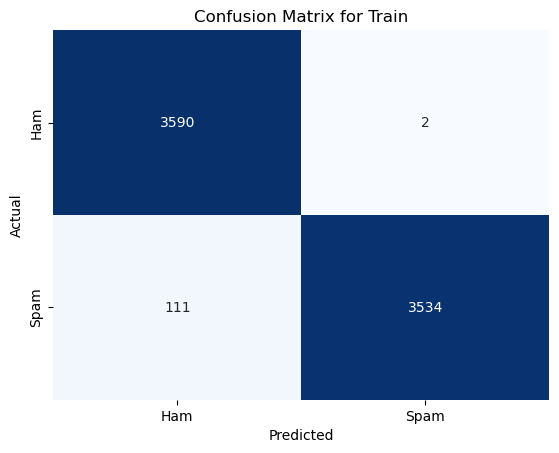

In [53]:
draw_confusion_matrix(y_train, y_pred_train_bernoulli_nb, c_matrix_for='Train')

In [54]:
print("Train report - bernoulli naive bayes:")
print(classification_report(y_train, y_pred_train_bernoulli_nb))
print("Test report - bernoulli naive bayes:")
print(classification_report(y_test, y_pred_test_bernoulli_nb))

Train report - bernoulli naive bayes:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3592
           1       1.00      0.97      0.98      3645

    accuracy                           0.98      7237
   macro avg       0.98      0.98      0.98      7237
weighted avg       0.98      0.98      0.98      7237

Test report - bernoulli naive bayes:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1233
           1       1.00      0.97      0.99      1180

    accuracy                           0.99      2413
   macro avg       0.99      0.99      0.99      2413
weighted avg       0.99      0.99      0.99      2413



In [55]:
print("Train accuracy - bernoulli naive bayes:", accuracy_score(y_train, y_pred_train_bernoulli_nb))
print("Test accuracy - bernoulli naive bayes:", accuracy_score(y_test, y_pred_test_bernoulli_nb))

Train accuracy - bernoulli naive bayes: 0.9843857952190134
Test accuracy - bernoulli naive bayes: 0.9863240779113137


## Building the Multinomial Naive Bayes based model:

$ \text{Multinomial Naive Bayes is a generative model that is used for the task of binary classification of text documents. In this case all the feature} \\ \text{variables in feature vector can take values from } \{1, 2, ..., |V|\} \text{ where } |V| \text{  is the dictionary size. These values of the feature variables represent} \\ \text{the indexes mapping to the words in the dictionary. Also the #feature variables in each feature vector can also vary because the length of each text} \\ \text{document can vary.} $

$$ \displaystyle \large \text{i.e. } x^{(i)} = [x^{(i)}_{1}, x^{(i)}_{2}, ..., x^{(d_i)}_{1}]^T \text{where } x^{(i)}_{j} = k \in \text{\{1, 2, ..., |V|\} for } j=1, 2, ..., d_i $$

$ d_i \text{ represents the #feature variables in the i-th training instance/text document.} $

$ \text{For each feature vector } x^{(i)} \text{ there is a label } y^{(i)} \in \text{{0,1}}  $

$ \text{So our data set is: } D = \{(x^{(i)}, y^{(i)}); i \in [1, 2, ..., n]  \} $

$ \textbf{Parameters in Multinomial Naive Bayes are: } p, p^0_k, p^1_k \\ 
\text{where: } p \text{ is the apriori probability of the the i-th datapoint being classified as belonging to class 1 i.e. } 
p = P(y^{(i)=1}) $

$ p^0_k \text{ is the probability of the j-th feature variable in the feature vector taking the value k given that the feature vector has label 0} \\ 
\text{i.e. }
p^0_k = P(x_j = k | y = 0)$

$ p^1_k \text{ is the probability of the j-th feature variable in the feature vector taking the value k given that the feature vector has label 1} \\ 
\text{i.e. }
p^1_k = P(x_j = k | y = 1)$

$ \text{And } k \in \text{\{1, 2, ..., |V|\}}  $

$ \textbf{Assumptions in Multinomial Naive Bayes:} $

$ \text{1. Given a class label the probability of any feature variable in the feature vector taking the value } k \text{ i.e. } P(x^{(i)}_j=k|y^{(i)}) \text{ is same for } \\ j=1, 2, ..., d_i  \text{.}  $

$ \text{2. All the training instances/text documents are independent of each other.} $

$ \textbf{The likelihood function for the Multinomial Naive Bayes model is: } $

$ L(p, p^0_k, p^1_k | \{(x^{(i)}, y^{(i)}); i \in [1, 2, ..., n]  \} ) =
\displaystyle \large \prod \limits _{i=1} ^n \{ \prod \limits _{j=1} ^{d_i} [(p^1_k)^{s^{(i)}_j} . (1 - p^1_k)^{1 - s^{(i)}_j}]^{y^{(i)}} . [(p^0_k)^{s^{(i)}_j} . (1 - p^0_k)^{1 - s^{(i)}_j}]^{1 - y^{(i)}}\} . p^{y^{(i)}} . 
(1-p)^{1 - y^{(i)}}$

$ \text{ where } s^{(i)}_j = \mathbb{1}(x^{(i)}_j = k) \text{ and } \mathbb{1} \text{ is the indicator function.} $

$ \textbf{From the maximum likelihood estimate we get the estimate for the parameters in Multinomial Naive Bayes: } $

$ p = \displaystyle \large \frac {\sum \limits _{i=1} ^{n} y^{(i)}} {n} \small = \textbf{Fraction of data points belonging to class 1} $

$ p^0_j = \displaystyle \large \frac {\sum \limits _{i=1} ^{n} \sum \limits _{j=1} ^{d_i} \mathbb{1}(x^{(i)}_j = k) . (1-y^{(i)})} {\sum \limits _{i=1} ^{n} (1-y^{(i)}).d_i} \small \\ = \textbf{Fraction of } k \textbf{-th index word among the documents labelled as 0.} $

$ p^1_j = \displaystyle \large \frac {\sum \limits _{i=1} ^{n} \sum \limits _{j=1} ^{d_i} \mathbb{1}(x^{(i)}_j = k) . y^{(i)}} {\sum \limits _{i=1} ^{n} y^{(i)}.d_i} \small \\ = \textbf{Fraction of } k \textbf{-th index word among the documents labelled as 1.} $

$ \textbf{Decision rule in Multinomial Naive Bayes:} $

$ \text{Classify as 1 if } P(y^{(i)} = 1 | x^{(i)}) \ge P(y^{(i)} = 0 | x^{(i)})
\text{ else classify as 0.}$

$ \text{i.e. Classify as 1 if } \displaystyle \large P(x^{(i)}|y^{(i)}=1) P(y^{(i)}=1) \ge P(x^{(i)}|y^{(i)}=0) P(y^{(i)}=0) 
\displaystyle \small \text{ else classify as 0.} $

$ \text{i.e. Classify as 1 if } \displaystyle \large p . \prod \limits _{j=1} ^{d_i} [(p^1_k)^{s^{(i)}_j} . (1 - p^1_k)^{1 - s^{(i)}_j}] \ge (1-p) . \prod \limits _{j=1} ^{d_i}  [(p^0_k)^{s^{(i)}_j} . (1 - p^0_k)^{1 - s^{(i)}_j}] \displaystyle \small \text{ else classify as 0.} $

$ \text{ where } s^{(i)}_j = \mathbb{1}(x^{(i)}_j = k) \text{ and } \mathbb{1} \text{ is the indicator function.} $

$ $

In [56]:
from sklearn.naive_bayes import MultinomialNB

In [57]:
multinomial_nb = MultinomialNB()

In [58]:
multinomial_nb.fit(x_train, y_train)

MultinomialNB()

In [59]:
y_pred_train_mulitinomial_nb = multinomial_nb.predict(x_train)
y_pred_test_mulitinomial_nb = multinomial_nb.predict(x_test)

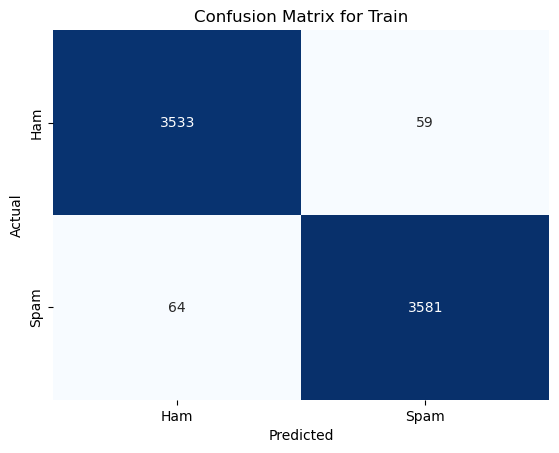

In [60]:
draw_confusion_matrix(y_train, y_pred_train_mulitinomial_nb, c_matrix_for='Train')

In [61]:
print("Train report - multinomial naive bayes:")
print(classification_report(y_train, y_pred_train_mulitinomial_nb))
print("Test report - multinomial naive bayes:")
print(classification_report(y_test, y_pred_test_mulitinomial_nb))

Train report - multinomial naive bayes:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3592
           1       0.98      0.98      0.98      3645

    accuracy                           0.98      7237
   macro avg       0.98      0.98      0.98      7237
weighted avg       0.98      0.98      0.98      7237

Test report - multinomial naive bayes:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1233
           1       0.98      0.98      0.98      1180

    accuracy                           0.98      2413
   macro avg       0.98      0.98      0.98      2413
weighted avg       0.98      0.98      0.98      2413



In [62]:
print("Train accuracy - multinomial naive bayes:", accuracy_score(y_train, y_pred_train_mulitinomial_nb))
print("Test accuracy - multinomial naive bayes:", accuracy_score(y_test, y_pred_test_mulitinomial_nb))

Train accuracy - multinomial naive bayes: 0.9830040071852978
Test accuracy - multinomial naive bayes: 0.9801077496891836


In [63]:
multinomial_nb.class_count_

array([3592., 3645.])

In [64]:
(y_train == 1).sum()

3645

In [65]:
multinomial_nb.class_log_prior_

array([-0.70049761, -0.68585039])

In [66]:
np.log(3592/(3592+3645))

-0.7004976054440375

In [67]:
multinomial_nb.feature_count_

array([[ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [13.,  7.,  8., ...,  0.,  0.,  0.]])

In [68]:
multinomial_nb.feature_count_.shape

(2, 8091)

In [69]:
multinomial_nb.n_features_in_

8091

In [70]:
multinomial_nb.coef_

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([[ -8.46453054,  -9.02414633,  -8.90636329, ..., -11.10358787,
        -11.10358787, -11.10358787]])

In [71]:
multinomial_nb.coef_.shape

(1, 8091)

## Conclusion:

**For the Naive Bayes based classifier:**
- Train accuracy: **98.44%**
- Test accuracy: **98.63%**

- Train macro-averaged f1-score: **98%**
- Test macro-averaged f1-score: **99%**
    
**For the Multinomial Bayes based classifier:**
- Train accuracy: **98.30%**
- Test accuracy: **98.01%**

- Train macro-averaged f1-score: **98%**
- Test macro-averaged f1-score: **98%**

**Both Bernoulli Naive Bayes based classifier and Multinomial Naive Bayes based classifier are suitable for this SMS classification problem.**